# Advanced Regression - Housing Prices Assignment

### Import libraries, load and display the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Step 1 : EDA
#### DATA UNDERSTANDING

#### About DataSet :-
- Name - train.csv
- Source :- Upgrad Portal
- Domain :- Housing

In [2]:
# Import the dataset into dataframe
train_df = pd.read_csv("train.csv", low_memory=False)

# Display the number of columns and rows of dataframe
print(train_df.shape)

# Display information about the dataframe (high level overview of dataframe)
print(train_df.info(verbose=True, show_counts=True))


(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
0
110


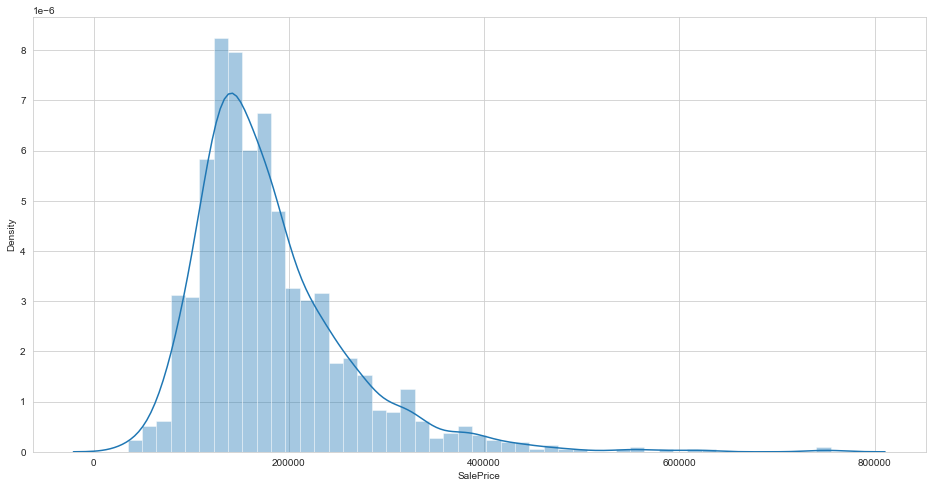

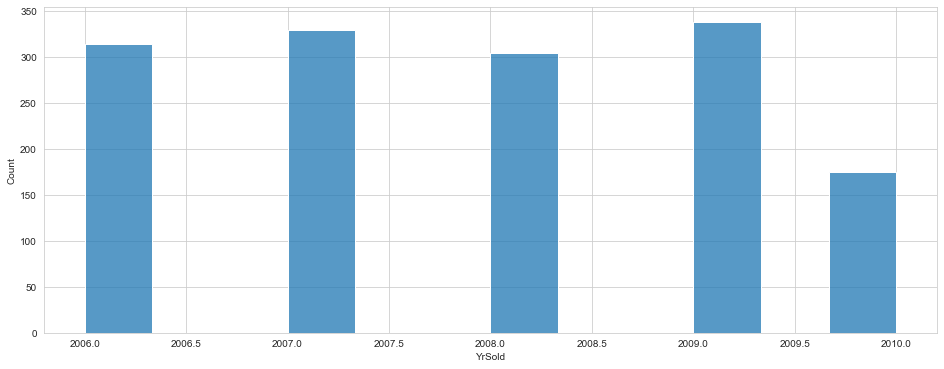

In [3]:
# Individual Column Analysis
# bellow are some examples of python functions used for individual analysis of each variable in train dataframe
# only few of them are stated bellow as they are repeatedly used for each column understanding 

print("SalePrice")
print(train_df["SalePrice"].describe())

print(train_df["HouseStyle"].unique())
print(train_df["YearBuilt"].isna().sum())
print(train_df["LotFrontage"].nunique(dropna = True))


# Ploting graph for understanding SalePrice variable

fig = plt.figure(figsize=(16,8))
sns.set_style("whitegrid") 
sns.distplot(train_df["SalePrice"]) 
plt.show()

# Ploting graph for understanding YrSold variable

fig = plt.figure(figsize=(16,6))
sns.set_style("whitegrid") 
sns.histplot(train_df["YrSold"]) 
plt.show()


In [4]:
# Display first few rows of the dataframe before data cleanup process

pd.set_option('display.max_columns', None)
print(train_df.head(10))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning

Flow for cleaning :-
1. Fix Rows and columns
2. Fix Missing Values
3. Standardize values
4. Fix Invalid Values
5. Filter Data
-----
1. Fixing Rows And Columns<br>
     A. Fixing Rows

In [6]:
# Finding duplicate Rows and delete if required

duplicate_rows = train_df[train_df.duplicated()]
print(duplicate_rows.shape)


# Checking and deleting Empty rows from Dataset
train_df = train_df[~train_df.isna().all(axis=1)]
print(train_df.shape)


(0, 81)
(1460, 81)


1. Fixing Rows And Columns<br>
    B. Fixing Columns:
        - Add coulumn names if missing :- covered in standardizee value step
        - delete unnecessary columns :- refer bellow code
        - spliting columns for more data - no columns splitted
        - Rename Columns Consistently :- refer bellow code
        - Merge columns for identifiers :- no columns are merged
        - Align missaligned columns :- no missaligned columns are found

In [7]:
# Drop the columns which are not required to achieve our goal

train_df.drop([
    'Id'
], axis = 1, inplace=True)

print(train_df.shape)

# columns to be renamed as
#     1. MSSubclass ---> SaleDwellingType
#     2. TotRmsAbvGrd ---> TotalRooms
#     3. MoSold ---> MonthSold

train_df.rename(columns = {'MSSubClass': 'SaleDwellingType', 'TotRmsAbvGrd': 'TotalRooms', 'MoSold': 'MonthSold'}, inplace = True)


(1460, 80)


In [8]:
print(train_df[['SaleDwellingType', 'TotalRooms', 'MonthSold']].head(1))

   SaleDwellingType  TotalRooms  MonthSold
0                60           8          2


2. Fixing Missing Values
       - Finding all rows and columns with  missing values
       - Fill Missing Values with some meaningful value 
       - fill partial missing values
       - remove missing values

In [9]:
# Finding columns and rows with empty (.eq('')) or NaN (.isnull()) values in the dataframe

missing_cols, missing_rows = ((train_df.isnull().sum(x) | train_df.eq('').sum(x)).loc[lambda x: x.gt(0)].index for x in (0, 1))
train_df.loc[missing_rows, missing_cols]


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [10]:
## Assumptions For treating missing value  
# Replacing LotFrontage Nan with its mean value 
# Replacing MasVnrType nan as 'None'
# Replacing MasVnrArea Nan with its mean value 
# Replacing BsmtQual nan as 'NA'
# Replacing BsmtCond nan as 'NA'
# Replacing BsmtExposure nan as 'NA'
# Replacing BsmtFinType1 nan as 'NA'
# Replacing BsmtFinType2 nan as 'NA' 
# Replacing GarageType nan as 'NA'
# Replacing GarageYrBlt with its mean value
# Replacing GarageFinish nan as 'NA' 
# Replacing GarageQual nan as 'NA'
# Replacing GarageCond nan as 'NA'
# Replacing FireplaceQu nan as 'NA'
# Replacing PoolQC nan as 'NA' 
# Replacing Alley nan as 'NA'
# Replacing Fence nan as 'NA'
# Replacing MiscFeature nan as 'NA'

train_df["LotFrontage"] = train_df["LotFrontage"].fillna(train_df["LotFrontage"].mean())

train_df["MasVnrType"] = train_df["MasVnrType"].fillna('None')

train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].mean())

train_df["BsmtQual"] = train_df["BsmtQual"].fillna('NA')

train_df["BsmtCond"] = train_df["BsmtCond"].fillna('NA')

train_df["BsmtExposure"] = train_df["BsmtExposure"].fillna('NA')

train_df["BsmtFinType1"] = train_df["BsmtFinType1"].fillna('NA')

train_df["BsmtFinType2"] = train_df["BsmtFinType2"].fillna('NA')

train_df["Electrical"] = train_df["Electrical"].fillna('NA')

train_df["GarageType"] = train_df["GarageType"].fillna('NA')

train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(train_df["GarageYrBlt"].mean())

train_df["GarageFinish"] = train_df["GarageFinish"].fillna('NA')

train_df["GarageQual"] = train_df["GarageQual"].fillna('NA')

train_df["GarageCond"] = train_df["GarageCond"].fillna('NA')

train_df["FireplaceQu"] = train_df["FireplaceQu"].fillna('NA')

train_df["PoolQC"] = train_df["PoolQC"].fillna('NA')

train_df["Alley"] = train_df["Alley"].fillna('NA')

train_df["Fence"] = train_df["Fence"].fillna('NA')

train_df["MiscFeature"] = train_df["MiscFeature"].fillna('NA')


In [11]:
# checking missing values again 

missing_cols, missing_rows = ((train_df.isnull().sum(x) | train_df.eq('').sum(x)).loc[lambda x: x.gt(0)].index for x in (0, 1))
train_df.loc[missing_rows, missing_cols]

""


-----------
3. Satndardize Values
    1. Standardize Numbers - remove outliers, scaling values, standardize precision
    2. Standardize text Values - remove extra characteres, standardize value formats
4. Fixing Invalid Values :- no invalid values found

In [12]:
# Satndardize Numbers

# 1. converting all numeric variables into catagorical variable which are actually catagorical in nature.

# MSSubClass(SaleDwellingType): converting catagory names as bellow
#  20 as SDTtwenty, 30 as SDTthirty, 40 as SDTfourty, 45 as SDTfourtyfive, 50 as SDTfifty, 60 as SDTsixty,
#  70 as SDTseventy, 75 as SDTseventyfive, 80 as SDTeighty, 85 as SDTeightyfive, 90 as SDTninty, 120 as SDTonetwenty,
#  150 as SDTonefifty, 160 as SDTonesixty, 180 as SDToneeighty, 190 as SDToneninty

train_df["SaleDwellingType"] = train_df["SaleDwellingType"].map({20:"SDTtwenty",30:"SDTthirty",40:"SDTfourty",45:"SDTfourtyfive",50:"SDTfifty",60:"SDTsixty",70:"SDTseventy",75:"SDTseventyfive",
                                       80:"SDTeighty",85:"SDTeightyfive",90:"SDTninty",120:"SDTonetwenty",150:"SDTonefifty",160:"SDTonesixty",180:"SDToneeighty",190:"SDToneninty"})

# OverallQual: converting catagory names as bellow
#  10 as OQVExcellent, 9 as OQExcellent,8 as OQVGood, 7 as OQGood, 6 as OQAbvAverage, 5 as OQAverage, 4 as OQBlwAverage, 3 as OQFair,
#  2 as OQPoor, 1 as OQVPoor

train_df["OverallQual"] = train_df["OverallQual"].map({10:"OQVExcellent", 9:"OQExcellent",8:"OQVGood", 7:"OQGood", 6:"OQAbvAverage",5:"OQAverage",
                        4:"OQBlwAverage",3:"OQFair",2:"OQPoor",1:"OQVPoor"})
    
# OverallCond: converting catagory names as bellow
#  10 as OCVExcellent, 9 as OCExcellent,8 as OCVGood, 7 as OCGood, 6 as OCAbvAverage, 5 as OCAverage, 4 as OCBlwAverage, 3 as OCFair,
#  2 as OcPoor, 1 as OcVPoor
 
train_df["OverallCond"] = train_df["OverallCond"].map({10:"OCVExcellent", 9:"OCExcellent",8:"OCVGood", 7:"OCGood", 6:"OCAbvAverage",5:"OCAverage",
                        4:"OCBlwAverage",3:"OCFair",2:"OCPoor",1:"OCVPoor"})

print(train_df["SaleDwellingType"].unique())
print(train_df["OverallQual"].unique())
print(train_df["OverallCond"].unique())

['SDTsixty' 'SDTtwenty' 'SDTseventy' 'SDTfifty' 'SDToneninty'
 'SDTfourtyfive' 'SDTninty' 'SDTonetwenty' 'SDTthirty' 'SDTeightyfive'
 'SDTeighty' 'SDTonesixty' 'SDTseventyfive' 'SDToneeighty' 'SDTfourty']
['OQGood' 'OQAbvAverage' 'OQVGood' 'OQAverage' 'OQExcellent'
 'OQBlwAverage' 'OQVExcellent' 'OQFair' 'OQVPoor' 'OQPoor']
['OCAverage' 'OCVGood' 'OCAbvAverage' 'OCGood' 'OCBlwAverage' 'OCPoor'
 'OCFair' 'OCExcellent' 'OCVPoor']


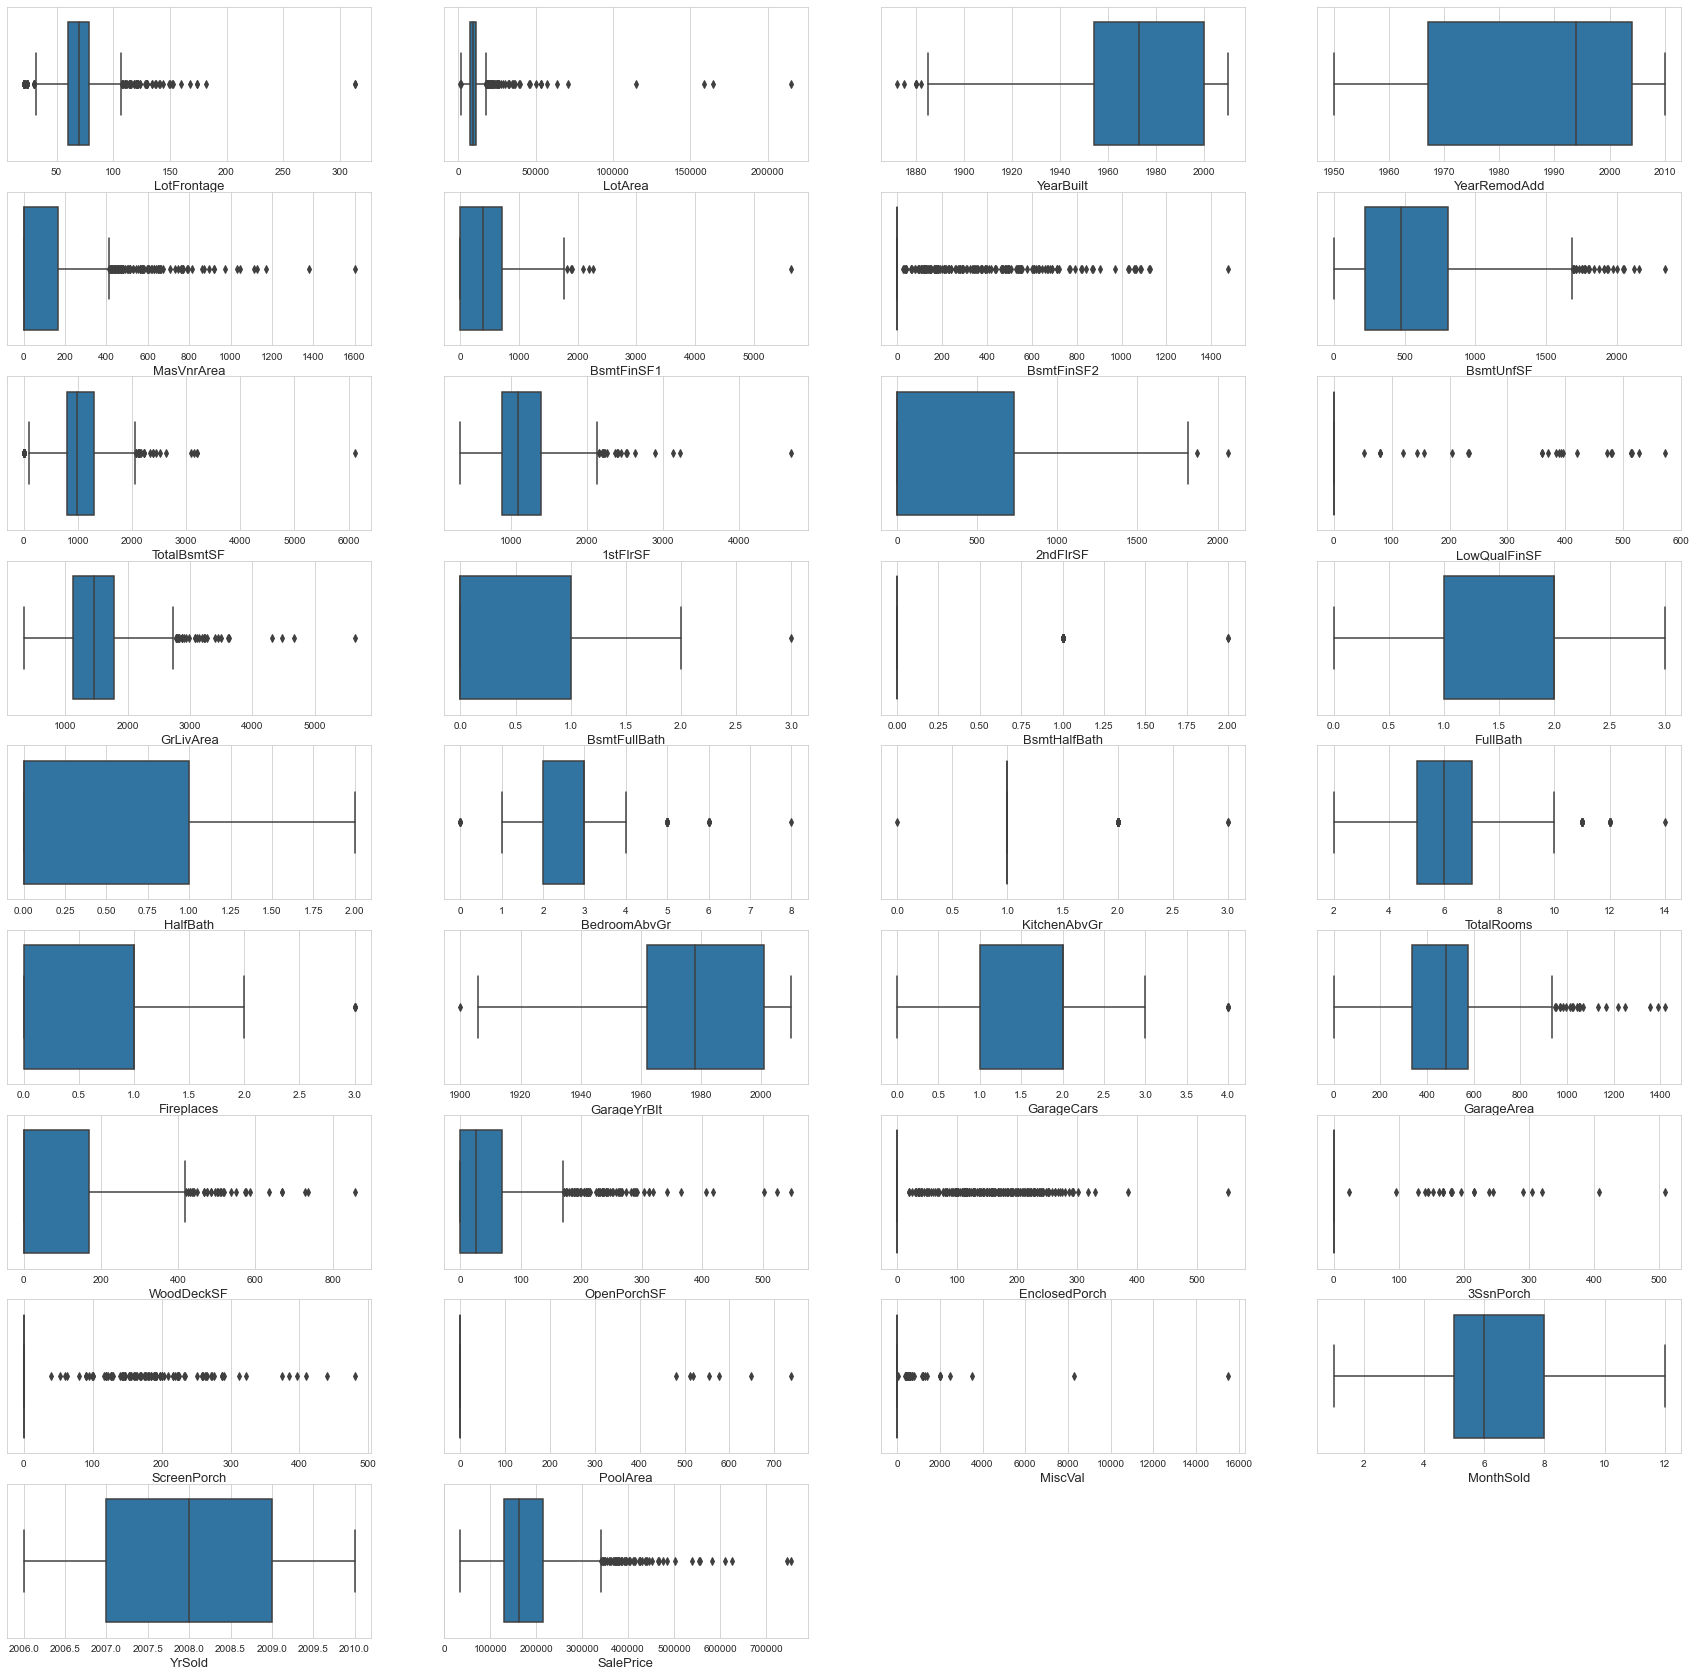

In [13]:

# 2. checking the coulmn formats

# GarageYrBlt is a float
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].astype('int32')

# 3. looking for outliers in target and other numeric variables variable

# deviding data into catagorical and continuous parts
df_catagorical = train_df.select_dtypes(['object'])
df_numeric = train_df[list(train_df._get_numeric_data().columns)]

count = 0
plt.figure(figsize=(30, 30))
for elm in df_numeric:
    plt.subplot(9,4,count+1)
    count = count + 1
    sns.boxplot(train_df[elm])
    plt.xlabel(elm, fontsize = 13)
plt.show()


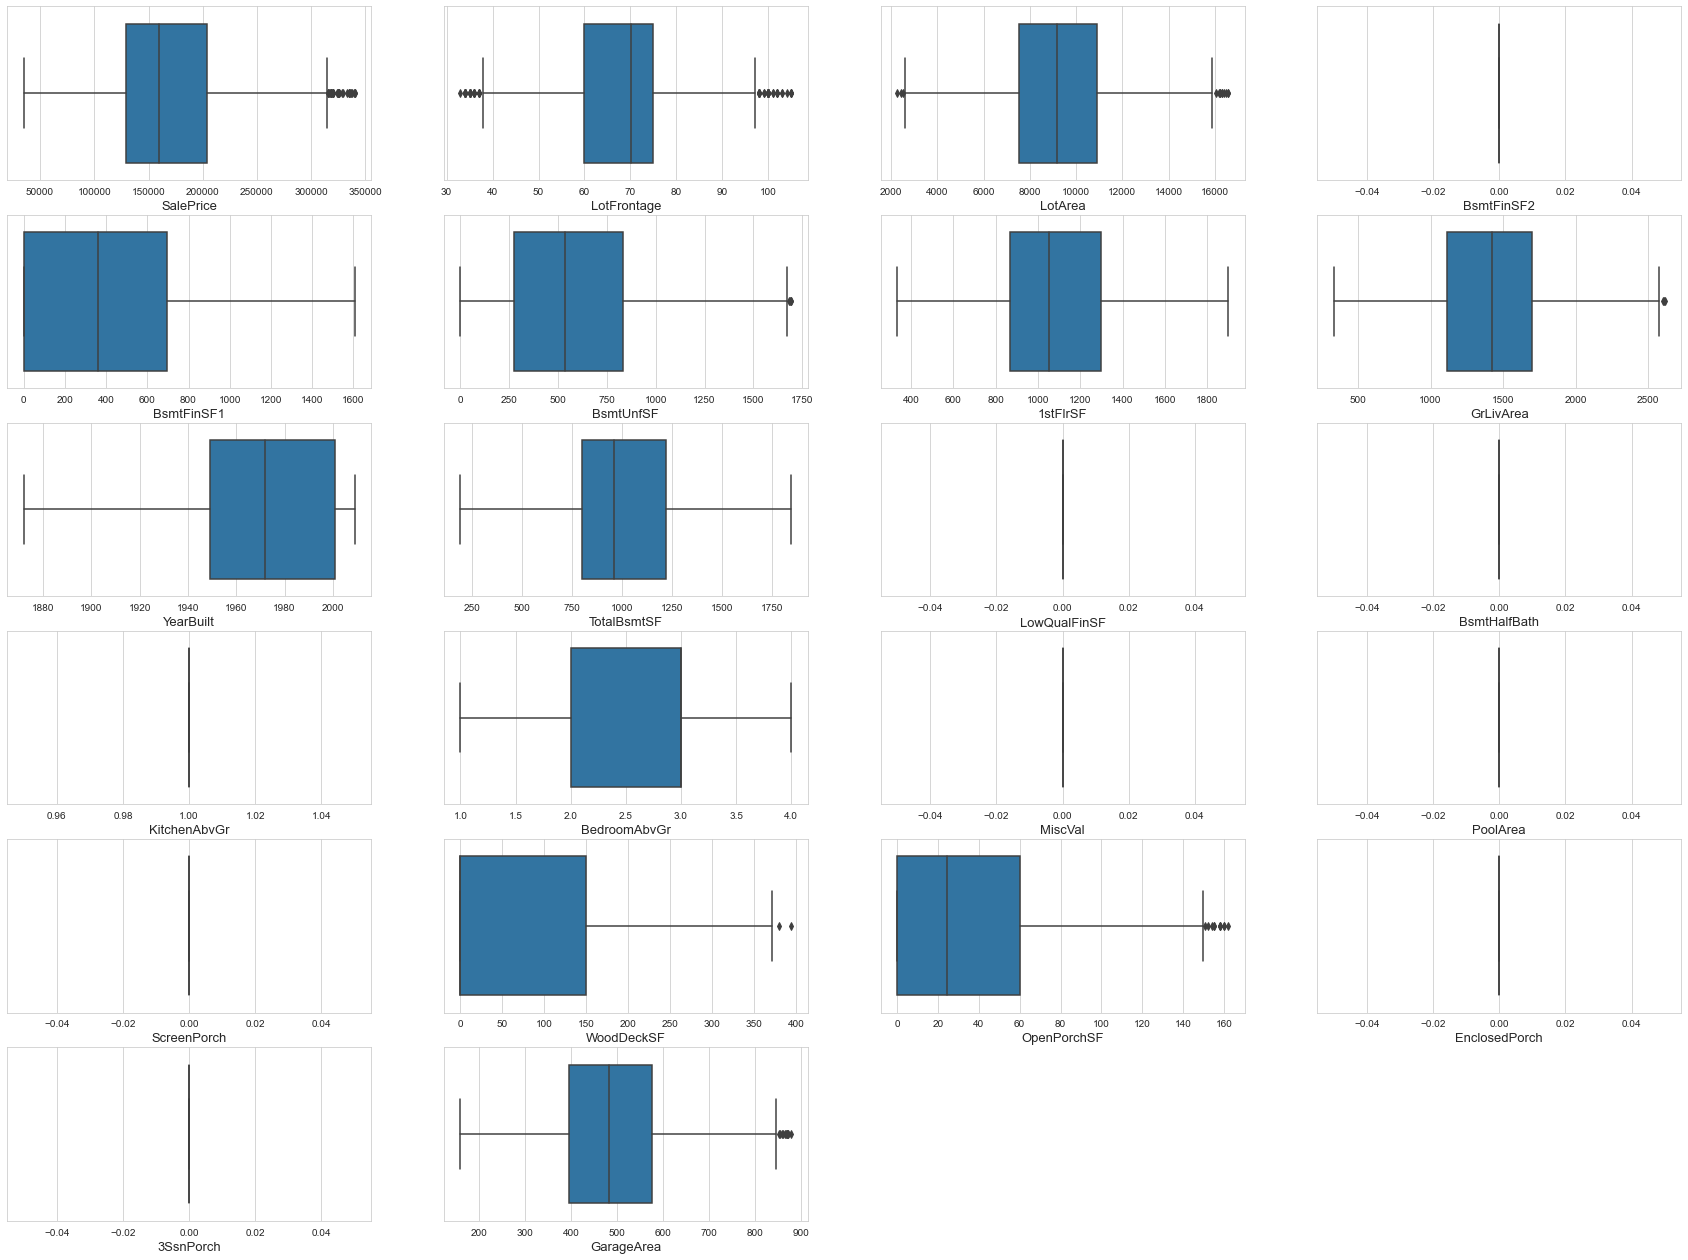

(581, 80)


In [14]:
# here are observed variables with outliers
outlierVar = ["SalePrice","LotFrontage","LotArea", "BsmtFinSF2", "BsmtFinSF1", "BsmtUnfSF", "1stFlrSF","GrLivArea","YearBuilt", "TotalBsmtSF", "LowQualFinSF","BsmtHalfBath","KitchenAbvGr","BedroomAbvGr", "MiscVal", "PoolArea", "ScreenPorch", "WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","GarageArea"]

# Remove outliers

plt.figure(figsize=(30, 30))
count = 0
for var in outlierVar:
    Q1 = train_df[var].quantile(0.25)
    Q3 = train_df[var].quantile(0.75)
    IQR = Q3 - Q1

    # left, right = left.align(right, axis=1, copy=False)
    train_df = train_df[~((train_df[var] < (Q1 - 1.5 * IQR)) | (train_df[var] > (Q3 + 1.5 * IQR)))]

    # Plot a boxplot after removing outliers 
    plt.subplot(8,4,count+1)
    count = count + 1
    sns.boxplot(train_df[var])
    plt.xlabel(var, fontsize = 13)    
plt.show()
print(train_df.shape)


#### 4. Fixing Invalid Values 

AS many columns have same value categories such as Ex , TA, pave it will impact while dummy variable creation 
hence renaming each category with its column name as prefix 
***for example*** :- "pave" category present in street column can be renamed as street_pave and pave category inside Alley can be renamed as Alley_pave

In [15]:
# renaming all categories for all catagorical variable

for variable in df_catagorical.columns:
    train_df[variable] =  train_df[variable].apply(lambda x: "".join([variable,"_", str(x)] ))
    
train_df.head()

,SaleDwellingType,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MonthSold,YrSold,SaleType,SaleCondition,SalePrice
0,SaleDwellingType_SDTsixty,MSZoning_RL,65.0,8450,Street_Pave,Alley_NA,LotShape_Reg,LandContour_Lvl,Utilities_AllPub,LotConfig_Inside,LandSlope_Gtl,Neighborhood_CollgCr,Condition1_Norm,Condition2_Norm,BldgType_1Fam,HouseStyle_2Story,OverallQual_OQGood,OverallCond_OCAverage,2003,2003,RoofStyle_Gable,RoofMatl_CompShg,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,196.0,ExterQual_Gd,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtCond_TA,BsmtExposure_No,BsmtFinType1_GLQ,706,BsmtFinType2_Unf,0,150,856,Heating_GasA,HeatingQC_Ex,CentralAir_Y,Electrical_SBrkr,856,854,0,1710,1,0,2,1,3,1,KitchenQual_Gd,8,Functional_Typ,0,FireplaceQu_NA,GarageType_Attchd,2003,GarageFinish_RFn,2,548,GarageQual_TA,GarageCond_TA,PavedDrive_Y,0,61,0,0,0,0,PoolQC_NA,Fence_NA,MiscFeature_NA,0,2,2008,SaleType_WD,SaleCondition_Normal,208500
2,SaleDwellingType_SDTsixty,MSZoning_RL,68.0,11250,Street_Pave,Alley_NA,LotShape_IR1,LandContour_Lvl,Utilities_AllPub,LotConfig_Inside,LandSlope_Gtl,Neighborhood_CollgCr,Condition1_Norm,Condition2_Norm,BldgType_1Fam,HouseStyle_2Story,OverallQual_OQGood,OverallCond_OCAverage,2001,2002,RoofStyle_Gable,RoofMatl_CompShg,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,162.0,ExterQual_Gd,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtCond_TA,BsmtExposure_Mn,BsmtFinType1_GLQ,486,BsmtFinType2_Unf,0,434,920,Heating_GasA,HeatingQC_Ex,CentralAir_Y,Electrical_SBrkr,920,866,0,1786,1,0,2,1,3,1,KitchenQual_Gd,6,Functional_Typ,1,FireplaceQu_TA,GarageType_Attchd,2001,GarageFinish_RFn,2,608,GarageQual_TA,GarageCond_TA,PavedDrive_Y,0,42,0,0,0,0,PoolQC_NA,Fence_NA,MiscFeature_NA,0,9,2008,SaleType_WD,SaleCondition_Normal,223500
4,SaleDwellingType_SDTsixty,MSZoning_RL,84.0,14260,Street_Pave,Alley_NA,LotShape_IR1,LandContour_Lvl,Utilities_AllPub,LotConfig_FR2,LandSlope_Gtl,Neighborhood_NoRidge,Condition1_Norm,Condition2_Norm,BldgType_1Fam,HouseStyle_2Story,OverallQual_OQVGood,OverallCond_OCAverage,2000,2000,RoofStyle_Gable,RoofMatl_CompShg,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,350.0,ExterQual_Gd,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtCond_TA,BsmtExposure_Av,BsmtFinType1_GLQ,655,BsmtFinType2_Unf,0,490,1145,Heating_GasA,HeatingQC_Ex,CentralAir_Y,Electrical_SBrkr,1145,1053,0,2198,1,0,2,1,4,1,KitchenQual_Gd,9,Functional_Typ,1,FireplaceQu_TA,GarageType_Attchd,2000,GarageFinish_RFn,3,836,GarageQual_TA,GarageCond_TA,PavedDrive_Y,192,84,0,0,0,0,PoolQC_NA,Fence_NA,MiscFeature_NA,0,12,2008,SaleType_WD,SaleCondition_Normal,250000
6,SaleDwellingType_SDTtwenty,MSZoning_RL,75.0,10084,Street_Pave,Alley_NA,LotShape_Reg,LandContour_Lvl,Utilities_AllPub,LotConfig_Inside,LandSlope_Gtl,Neighborhood_Somerst,Condition1_Norm,Condition2_Norm,BldgType_1Fam,HouseStyle_1Story,OverallQual_OQVGood,OverallCond_OCAverage,2004,2005,RoofStyle_Gable,RoofMatl_CompShg,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_Stone,186.0,ExterQual_Gd,ExterCond_TA,Foundation_PConc,BsmtQual_Ex,BsmtCond_TA,BsmtExposure_Av,BsmtFinType1_GLQ,1369,BsmtFinType2_Unf,0,317,1686,Heating_GasA,HeatingQC_Ex,CentralAir_Y,Electrical_SBrkr,1694,0,0,1694,1,0,2,0,3,1,KitchenQual_Gd,7,Functional_Typ,1,FireplaceQu_Gd,Gar

In [16]:
#### DataFrame after data cleaning step

print(train_df.shape)
pd.set_option('display.max_columns', None)
train_df.head()

(581, 80)


,SaleDwellingType,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotalRooms,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MonthSold,YrSold,SaleType,SaleCondition,SalePrice
0,SaleDwellingType_SDTsixty,MSZoning_RL,65.0,8450,Street_Pave,Alley_NA,LotShape_Reg,LandContour_Lvl,Utilities_AllPub,LotConfig_Inside,LandSlope_Gtl,Neighborhood_CollgCr,Condition1_Norm,Condition2_Norm,BldgType_1Fam,HouseStyle_2Story,OverallQual_OQGood,OverallCond_OCAverage,2003,2003,RoofStyle_Gable,RoofMatl_CompShg,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,196.0,ExterQual_Gd,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtCond_TA,BsmtExposure_No,BsmtFinType1_GLQ,706,BsmtFinType2_Unf,0,150,856,Heating_GasA,HeatingQC_Ex,CentralAir_Y,Electrical_SBrkr,856,854,0,1710,1,0,2,1,3,1,KitchenQual_Gd,8,Functional_Typ,0,FireplaceQu_NA,GarageType_Attchd,2003,GarageFinish_RFn,2,548,GarageQual_TA,GarageCond_TA,PavedDrive_Y,0,61,0,0,0,0,PoolQC_NA,Fence_NA,MiscFeature_NA,0,2,2008,SaleType_WD,SaleCondition_Normal,208500
2,SaleDwellingType_SDTsixty,MSZoning_RL,68.0,11250,Street_Pave,Alley_NA,LotShape_IR1,LandContour_Lvl,Utilities_AllPub,LotConfig_Inside,LandSlope_Gtl,Neighborhood_CollgCr,Condition1_Norm,Condition2_Norm,BldgType_1Fam,HouseStyle_2Story,OverallQual_OQGood,OverallCond_OCAverage,2001,2002,RoofStyle_Gable,RoofMatl_CompShg,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,162.0,ExterQual_Gd,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtCond_TA,BsmtExposure_Mn,BsmtFinType1_GLQ,486,BsmtFinType2_Unf,0,434,920,Heating_GasA,HeatingQC_Ex,CentralAir_Y,Electrical_SBrkr,920,866,0,1786,1,0,2,1,3,1,KitchenQual_Gd,6,Functional_Typ,1,FireplaceQu_TA,GarageType_Attchd,2001,GarageFinish_RFn,2,608,GarageQual_TA,GarageCond_TA,PavedDrive_Y,0,42,0,0,0,0,PoolQC_NA,Fence_NA,MiscFeature_NA,0,9,2008,SaleType_WD,SaleCondition_Normal,223500
4,SaleDwellingType_SDTsixty,MSZoning_RL,84.0,14260,Street_Pave,Alley_NA,LotShape_IR1,LandContour_Lvl,Utilities_AllPub,LotConfig_FR2,LandSlope_Gtl,Neighborhood_NoRidge,Condition1_Norm,Condition2_Norm,BldgType_1Fam,HouseStyle_2Story,OverallQual_OQVGood,OverallCond_OCAverage,2000,2000,RoofStyle_Gable,RoofMatl_CompShg,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,350.0,ExterQual_Gd,ExterCond_TA,Foundation_PConc,BsmtQual_Gd,BsmtCond_TA,BsmtExposure_Av,BsmtFinType1_GLQ,655,BsmtFinType2_Unf,0,490,1145,Heating_GasA,HeatingQC_Ex,CentralAir_Y,Electrical_SBrkr,1145,1053,0,2198,1,0,2,1,4,1,KitchenQual_Gd,9,Functional_Typ,1,FireplaceQu_TA,GarageType_Attchd,2000,GarageFinish_RFn,3,836,GarageQual_TA,GarageCond_TA,PavedDrive_Y,192,84,0,0,0,0,PoolQC_NA,Fence_NA,MiscFeature_NA,0,12,2008,SaleType_WD,SaleCondition_Normal,250000
6,SaleDwellingType_SDTtwenty,MSZoning_RL,75.0,10084,Street_Pave,Alley_NA,LotShape_Reg,LandContour_Lvl,Utilities_AllPub,LotConfig_Inside,LandSlope_Gtl,Neighborhood_Somerst,Condition1_Norm,Condition2_Norm,BldgType_1Fam,HouseStyle_1Story,OverallQual_OQVGood,OverallCond_OCAverage,2004,2005,RoofStyle_Gable,RoofMatl_CompShg,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_Stone,186.0,ExterQual_Gd,ExterCond_TA,Foundation_PConc,BsmtQual_Ex,BsmtCond_TA,BsmtExposure_Av,BsmtFinType1_GLQ,1369,BsmtFinType2_Unf,0,317,1686,Heating_GasA,HeatingQC_Ex,CentralAir_Y,Electrical_SBrkr,1694,0,0,1694,1,0,2,0,3,1,KitchenQual_Gd,7,Functional_Typ,1,FireplaceQu_Gd,Gar

#### DATA ANALYSIS

1. Univariate Analysis - (ordered/unordered categorical variable, quantitive variable )
2. Segmented Univariate Analysis ( categorical variable -- groupby , metrics based on mean, median, mode )
3. Bivariate Analysis ( continuous , categorical)
4. Derived Metrics ( Type Driven, Business Driven, Data Driven )

##### Univariate Analysis

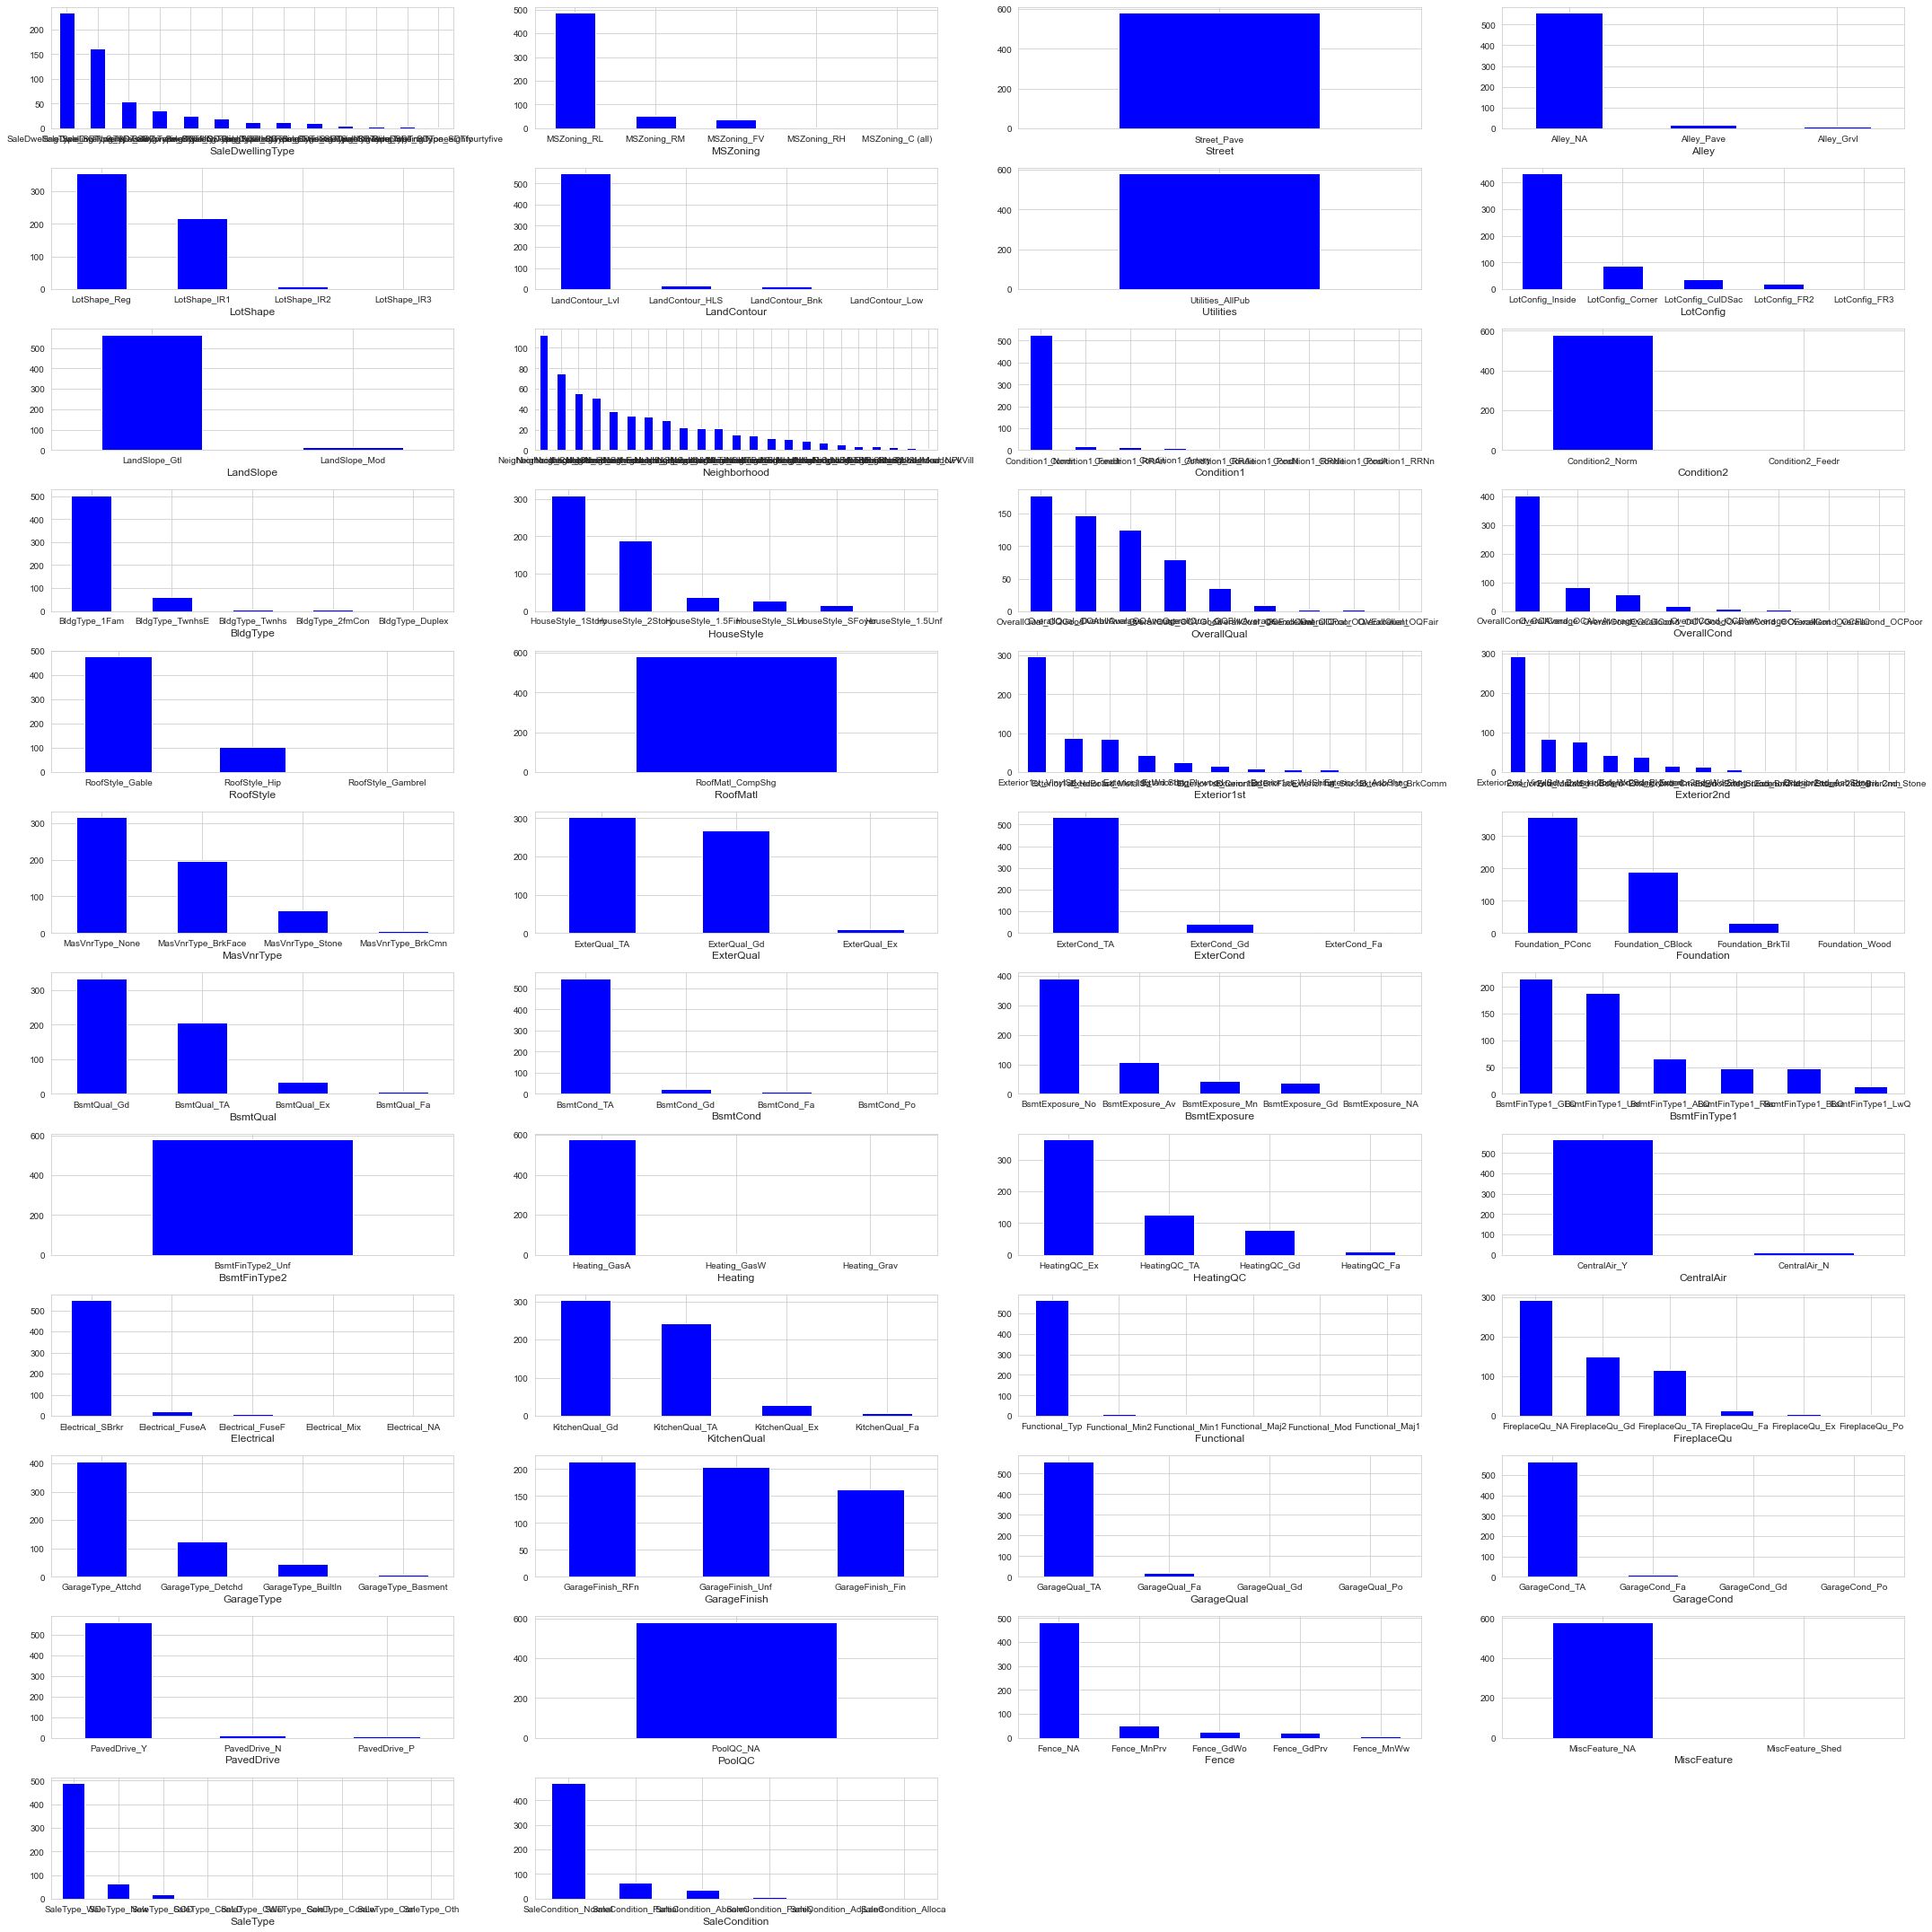

In [17]:
# univariate analysis for Catagorical columns
count = 0
plt.figure(figsize=(30,30))

for var in df_catagorical.columns:
    plt.subplot(12, 4, count + 1)
    train_df[var].value_counts().plot(kind='bar', color='blue')
    plt.xticks(rotation=0)
    plt.xlabel(var, fontsize = 12)
    count += 1
    plt.tight_layout()
plt.show()


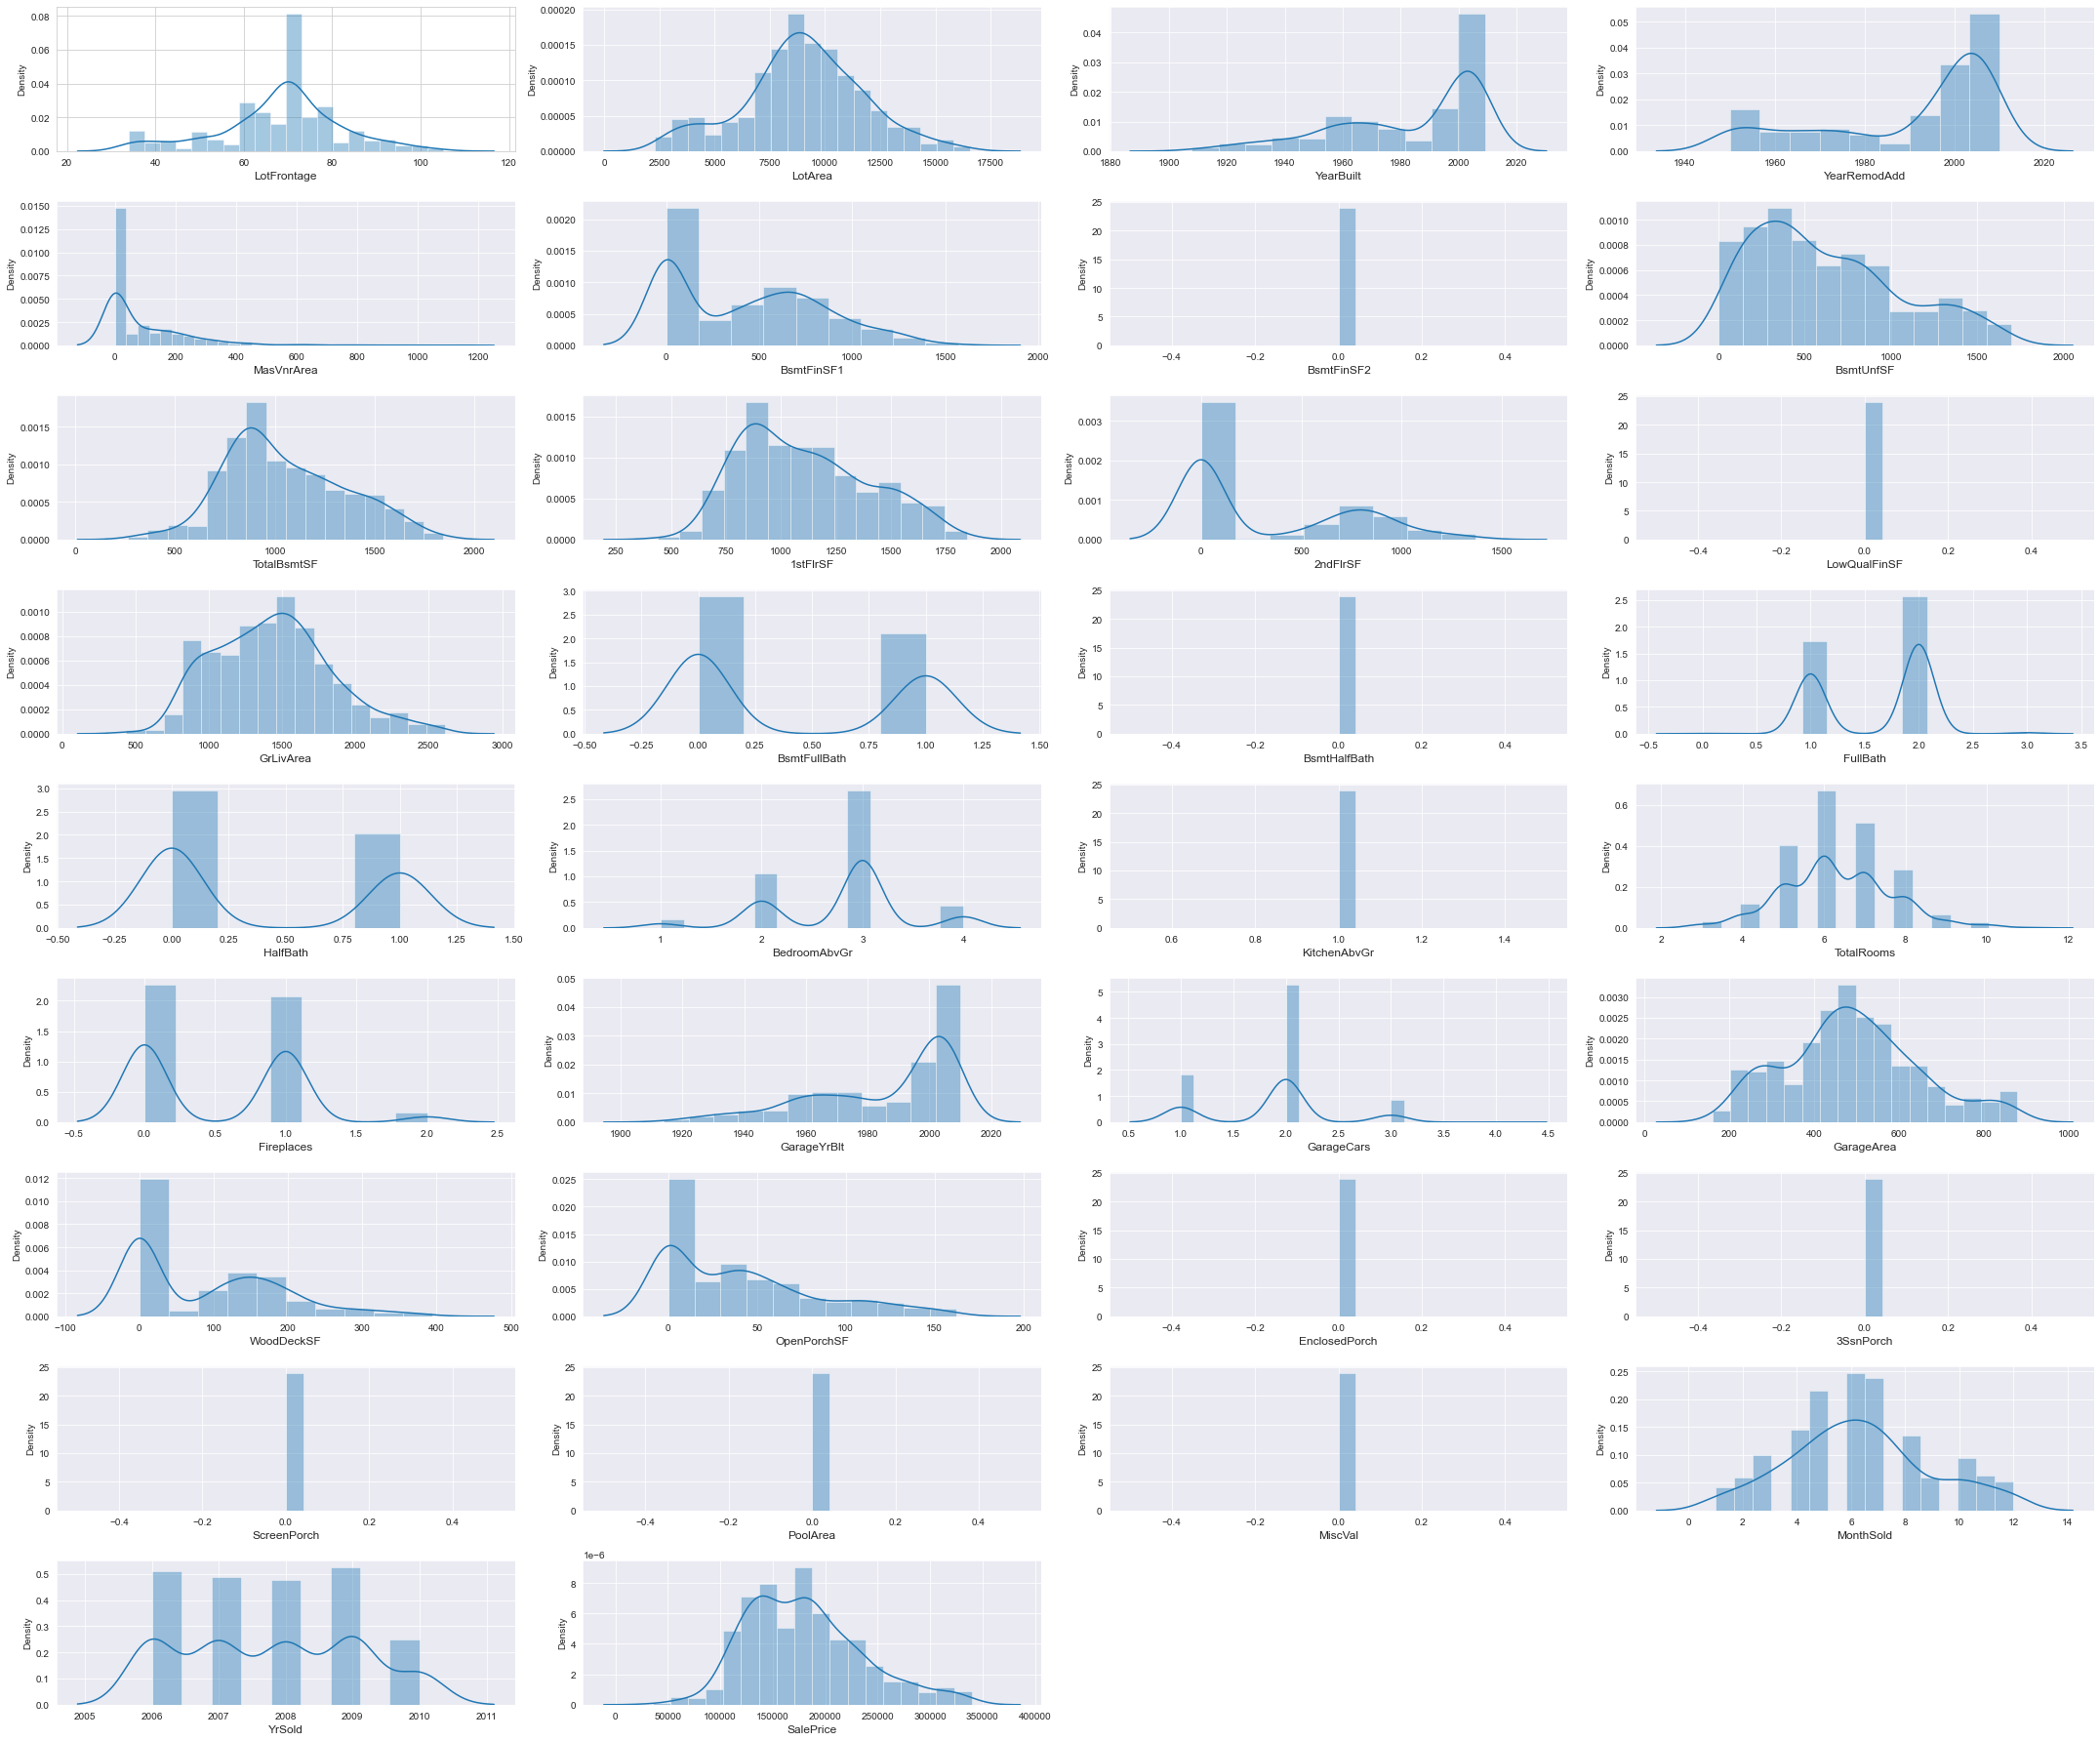

In [18]:
# Univariate Analysis on numeric data - using distribution plot for all numeric variables
plt.show()

count = 0
plt.figure(figsize=(30,30))
for var in df_numeric.columns:
    plt.subplot(11, 4, count + 1)
    sns.set_style("darkgrid") 
    sns.distplot(train_df[var]) 
    plt.xticks(rotation=0)
    plt.xlabel(var, fontsize = 12)
    count += 1
    plt.tight_layout()
plt.show()

#### Bivariate Analysis

****SalesPrice*** our Target variable we will see some features that are highly correlated with it.

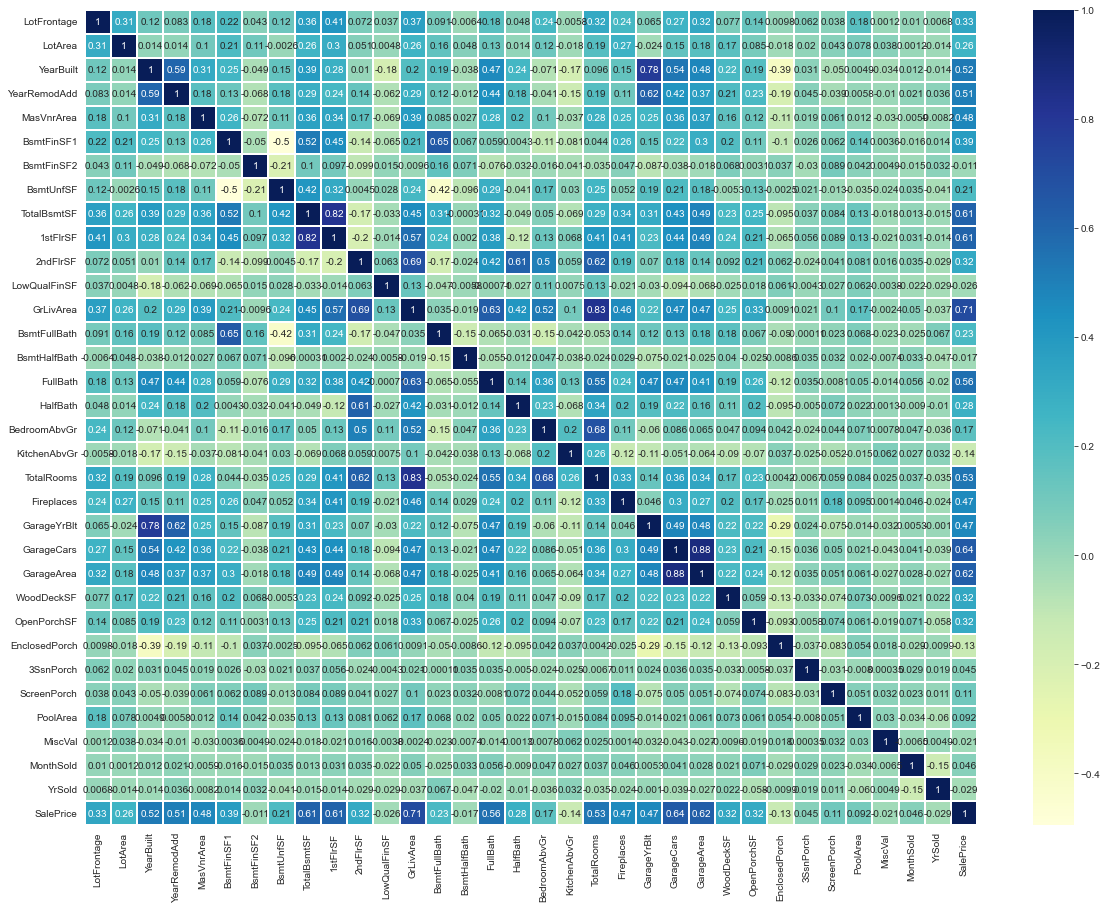

In [19]:
# First we will look at heat map for checking correlation between all the variables
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 15))
sns.heatmap(df_numeric.corr(), annot = True, cmap="YlGnBu", linewidths=.3)
plt.show()

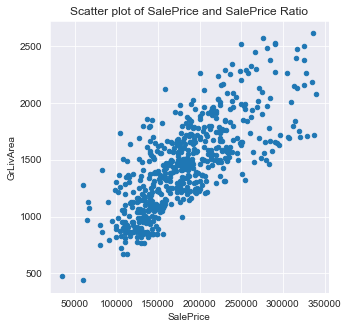

In [20]:
# Observation:- GrLivArea , GarageCars, GarageArea , totalBsmntSF, 1stFlrSF these are some highly corelated variables with salesPrice
# Analysing them in saperatly

# Scatter plot 

train_df.plot.scatter(x="SalePrice", y="GrLivArea", figsize=(5,5))
plt.xlabel("SalePrice")
plt.ylabel("GrLivArea")
plt.title("Scatter plot of SalePrice and SalePrice Ratio")
plt.show()

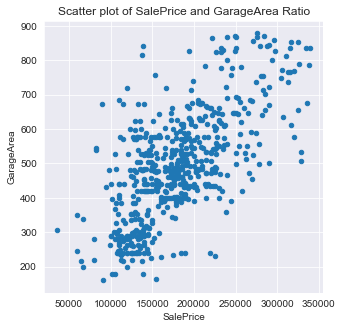

In [21]:
train_df.plot.scatter(x="SalePrice", y="GarageArea", figsize=(5,5))
plt.xlabel("SalePrice")
plt.ylabel("GarageArea")
plt.title("Scatter plot of SalePrice and GarageArea Ratio")
plt.show()

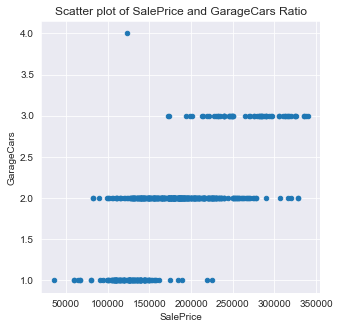

In [22]:
train_df.plot.scatter(x="SalePrice", y="GarageCars", figsize=(5,5))
plt.xlabel("SalePrice")
plt.ylabel("GarageCars")
plt.title("Scatter plot of SalePrice and GarageCars Ratio")
plt.show()

#### Segmented Univariate Analysis

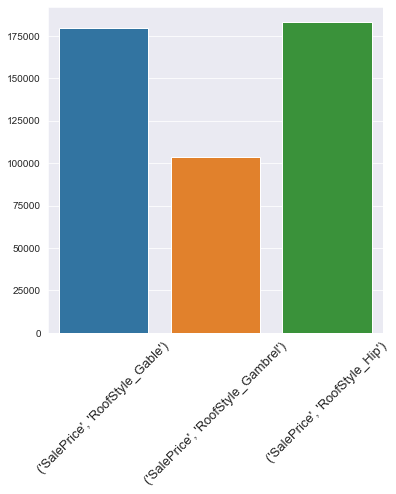

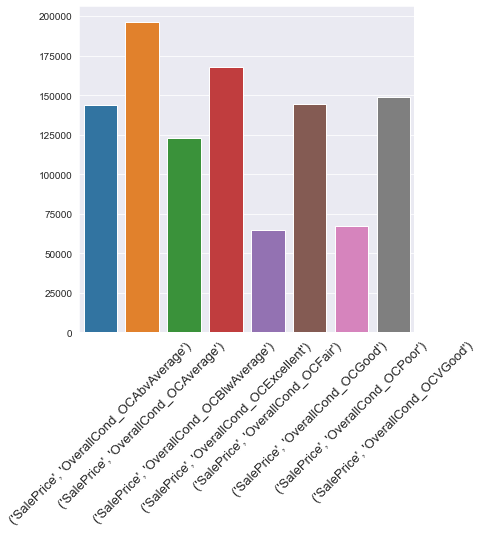

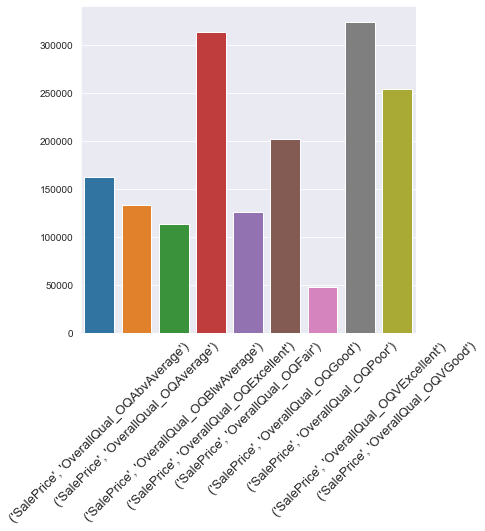

In [23]:

# understanding how catagorical variables are impacting
#RoofStyle , OverallCond 

fig = plt.figure(figsize=(6,6))
df = train_df.pivot_table(index=['RoofStyle'],columns='RoofStyle', aggfunc='mean')
df = df[["SalePrice"]]
sns.barplot(data=df)
plt.xticks(rotation=45, fontsize=13)
plt.show()

fig = plt.figure(figsize=(6,6))
df = train_df.pivot_table(index=['OverallCond'],columns='OverallCond', aggfunc='mean')
df = df[["SalePrice"]]
sns.barplot(data=df)
plt.xticks(rotation=45, fontsize=13)
plt.show()

# checking quality check 
fig = plt.figure(figsize=(6,6))
df = train_df.pivot_table(index=['OverallQual'],columns='OverallQual', aggfunc='mean')
df = df[["SalePrice"]]
sns.barplot(data=df)
plt.xticks(rotation=45, fontsize=13)
plt.show()

### Step 2: Data Preparation
#### A] Creating Dummy variables for all catagorical variable

In [24]:
## 1. creating dummy variables and merging it into main datset

df_catagorical = train_df.select_dtypes(['object'])
df_numeric = train_df[list(train_df._get_numeric_data().columns)]

for cat in df_catagorical:
    newdf = pd.get_dummies(train_df[cat], drop_first = True)
    train_df = pd.concat([train_df, newdf], axis=1)

## deleting columns from which we have created dummy variables
# Dropping Columns
train_df = train_df.drop(df_catagorical.columns, axis=1)

# A closer look at Dataframe after adding dummy variables
pd.set_option('display.max_columns', 300)
display(train_df.head(5))

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotalRooms,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MonthSold,YrSold,SalePrice,SaleDwellingType_SDTeightyfive,SaleDwellingType_SDTfifty,SaleDwellingType_SDTfourtyfive,SaleDwellingType_SDTninty,SaleDwellingType_SDToneeighty,SaleDwellingType_SDToneninty,SaleDwellingType_SDTonesixty,SaleDwellingType_SDTonetwenty,SaleDwellingType_SDTseventy,SaleDwellingType_SDTsixty,SaleDwellingType_SDTthirty,SaleDwellingType_SDTtwenty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_OQAverage,OverallQual_OQBlwAverage,OverallQual_OQExcellent,OverallQual_OQFair,OverallQual_OQGood,OverallQual_OQPoor,OverallQual_OQVExcellent,OverallQual_OQVGood,OverallCond_OCAverage,OverallCond_OCBlwAverage,OverallCond_OCExcellent,OverallCond_OCFair,OverallCond_OCGood,OverallCond_OCPoor,OverallCond_OCVGood,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

#### B] Splitting the Data into Training and Testing Sets (first step towards linear regression)

In [25]:
# importing libraries required for train test split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(train_df, train_size = 0.7, test_size = 0.3, random_state = 100) #70-30 ratio used for splitting

print(df_train.shape, df_test.shape)

(406, 221) (175, 221)


#### C] Rescaling the Features
There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
here i have used Min-Max scaling

In [26]:
# importing library required for MinMaxScaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # defining scaler object

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables or the columns which requires scaling
num_vars = df_numeric.columns
# Rescale the variables from train dataset
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotalRooms,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MonthSold,YrSold,SalePrice,SaleDwellingType_SDTeightyfive,SaleDwellingType_SDTfifty,SaleDwellingType_SDTfourtyfive,SaleDwellingType_SDTninty,SaleDwellingType_SDToneeighty,SaleDwellingType_SDToneninty,SaleDwellingType_SDTonesixty,SaleDwellingType_SDTonetwenty,SaleDwellingType_SDTseventy,SaleDwellingType_SDTsixty,SaleDwellingType_SDTthirty,SaleDwellingType_SDTtwenty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_OQAverage,OverallQual_OQBlwAverage,OverallQual_OQExcellent,OverallQual_OQFair,OverallQual_OQGood,OverallQual_OQPoor,OverallQual_OQVExcellent,OverallQual_OQVGood,OverallCond_OCAverage,OverallCond_OCBlwAverage,OverallCond_OCExcellent,OverallCond_OCFair,OverallCond_OCGood,OverallCond_OCPoor,OverallCond_OCVGood,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,0.405797,0.395256,0.898990,0.833333,0.000000,0.000000,0.0,0.562574,0.436076,0.366287,0.519461,0.0,0.556118,0.0,0.0,0.666667,1.0,0.666667,0.0,0.571429,0.5,0.885417,0.333333,0.414566,0.000000,0.246914,0.0,0.0,0.0,0.0,0.0,0.636364,0.25,0.462257,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [27]:
df_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotalRooms,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MonthSold,YrSold,SalePrice,SaleDwellingType_SDTeightyfive,SaleDwellingType_SDTfifty,SaleDwellingType_SDTfourtyfive,SaleDwellingType_SDTninty,SaleDwellingType_SDToneeighty,SaleDwellingType_SDToneninty,SaleDwellingType_SDTonesixty,SaleDwellingType_SDTonetwenty,SaleDwellingType_SDTseventy,SaleDwellingType_SDTsixty,SaleDwellingType_SDTthirty,SaleDwellingType_SDTtwenty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_OQAverage,OverallQual_OQBlwAverage,OverallQual_OQExcellent,OverallQual_OQFair,OverallQual_OQGood,OverallQual_OQPoor,OverallQual_OQVExcellent,OverallQual_OQVGood,OverallCond_OCAverage,OverallCond_OCBlwAverage,OverallCond_OCExcellent,OverallCond_OCFair,OverallCond_OCGood,OverallCond_OCPoor,OverallCond_OCVGood,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.0,406.000000,406.000000,406.000000,406.000000,406.0,406.000000,406.000000,406.0,406.000000,406.000000,406.000000,406.0,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.0,406.0,406.0,406.0,406.0,406.000000,406.000000,406.0

###  Step 3: Model building 

In [28]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# importing statsmodels for model creation and VIF Calculation
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


# deviding train set into x and y set
y_train = df_train.pop('SalePrice') 
X_train = df_train

# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

# lets look at which columns are selected and which are not along with there ranking by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 165),
 ('LotArea', False, 72),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 167),
 ('MasVnrArea', False, 152),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 37),
 ('BsmtUnfSF', False, 8),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 38),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 177),
 ('BsmtHalfBath', False, 46),
 ('FullBath', False, 178),
 ('HalfBath', False, 170),
 ('BedroomAbvGr', False, 174),
 ('KitchenAbvGr', False, 36),
 ('TotalRooms', False, 96),
 ('Fireplaces', False, 93),
 ('GarageYrBlt', False, 112),
 ('GarageCars', False, 42),
 ('GarageArea', False, 74),
 ('WoodDeckSF', False, 79),
 ('OpenPorchSF', False, 127),
 ('EnclosedPorch', False, 48),
 ('3SsnPorch', False, 43),
 ('ScreenPorch', False, 41),
 ('PoolArea', False, 40),
 ('MiscVal', False, 50),
 ('MonthSold', False, 137),
 ('YrSold', False, 108),
 ('SaleDwellingType_SDTeightyfive', False, 122),
 ('SaleDwellingType_SDTfifty', Fal

In [29]:
# rfe.support_ shoes the vaiable names that are picked by RFE for model building
col = X_train.columns[rfe.support_]

# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Linear Model 1 :-

In [30]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

# Let's see the summary of our linear model 1 :-
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          7.36e-178
Time:                        18:36:11   Log-Likelihood:                 567.81
No. Observations:                 406   AIC:                            -1100.
Df Residuals:                     388   BIC:                            -1027.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0296    

#### Residual Analysis of the train data

Text(0.5, 0, 'Errors')

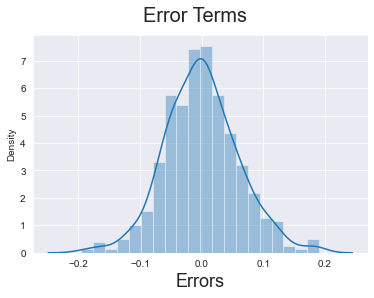

In [31]:
# LinearRegression libraries predict method can be used to get ypred for trinaing dataset
y_train_saleprice = lm.predict(X_train_rfe) # here y_train_cnt is our predicted value of y 

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_saleprice), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  

#### Making Predictions using last model created
Applying the scaling on the test sets

In [32]:
num_vars = df_numeric.columns

# Rescale the variables from test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotalRooms,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MonthSold,YrSold,SalePrice,SaleDwellingType_SDTeightyfive,SaleDwellingType_SDTfifty,SaleDwellingType_SDTfourtyfive,SaleDwellingType_SDTninty,SaleDwellingType_SDToneeighty,SaleDwellingType_SDToneninty,SaleDwellingType_SDTonesixty,SaleDwellingType_SDTonetwenty,SaleDwellingType_SDTseventy,SaleDwellingType_SDTsixty,SaleDwellingType_SDTthirty,SaleDwellingType_SDTtwenty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_OQAverage,OverallQual_OQBlwAverage,OverallQual_OQExcellent,OverallQual_OQFair,OverallQual_OQGood,OverallQual_OQPoor,OverallQual_OQVExcellent,OverallQual_OQVGood,OverallCond_OCAverage,OverallCond_OCBlwAverage,OverallCond_OCExcellent,OverallCond_OCFair,OverallCond_OCGood,OverallCond_OCPoor,OverallCond_OCVGood,RoofStyle_Gambrel,RoofStyle_Hip,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasW,Heating_Grav,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
333,0.362319,0.414917,0.949495,0.90,0.149744,0.459477,0.0,0.376623,0.692405,0.654339,0.000000,0.0,0.423183,1.0,0.0,0.666667,0.0,0.333333,0.0,0.428571,0.5,0.937500,0.333333,0.448179,0.487310,0.185185,0.0,0.0,0.0,0.0,0.0,0.545455,0.50,0.568151,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

Dividing into X_test and y_test

In [33]:
y_test = df_test.pop('SalePrice')
X_test = df_test

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


# Making predictions
y_pred = lm.predict(X_test_new)

#### Model Evaluation
Calculating R squared for test data set

In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.7463200882123835


Text(0, 0.5, 'y_pred')

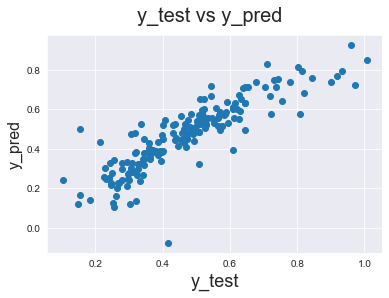

In [35]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### Observation :- R2 decreased on test data so we can use regularization methods that is ridge and lasso regression

### Lasso Regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# creating  Lasso object
lasso = Lasso()

# cross validation using k folds
folds = 5
gridSearchModel = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    

# fiting the model for train data
gridSearchModel.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
# GridSearchCV model results
GSresults = pd.DataFrame(gridSearchModel.cv_results_)
GSresults = GSresults[GSresults['param_alpha']<=1]
GSresults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.078217,0.007140,0.009806,0.007617,0.0001,{'alpha': 0.0001},-0.039858,-0.036771,-0.038358,-0.037665,-0.037006,-0.037932,0.001111,1,-0.022490,-0.024226,-0.023187,-0.023623,-0.023692,-0.023444,0.000580
1,0.016540,0.000805,0.006315,0.007735,0.001,{'alpha': 0.001},-0.045221,-0.042129,-0.041088,-0.040384,-0.044831,-0.042730,0.001959,2,-0.034554,-0.034634,-0.034120,-0.035019,-0.035538,-0.034773,0.000477
2,0.015857,0.000446,0.000000,0.000000,0.01,{'alpha': 0.01},-0.066967,-0.071900,-0.067029,-0.064688,-0.096699,-0.073457,0.011857,3,-0.069402,-0.070562,-0.069954,-0.069875,-0.070324,-0.070023,0.000399
3,0.012543,0.006272,0.016239,0.000942,0.05,{'alpha': 0.05},-0.139109,-0.131757,-0.119076,-0.136561,-0.161718,-0.137644,0.013873,4,-0.138922,-0.136002,-0.140664,-0.135992,-0.130994,-0.136515,0.003287
4,0.016245,0.001484,0.002872,0.003639,0.1,{'alpha': 0.1},-0.149138,-0.140430,-0.131254,-0.147673,-0.169018,-0.147503,0.012487,5,-0.146704,-0.148272,-0.150425,-0.146565,-0.139568,-0.146307,0.003646


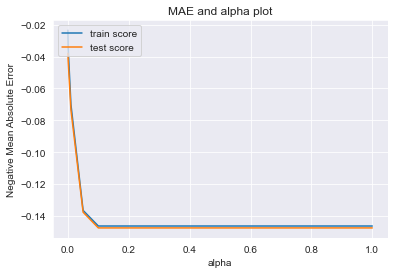

In [38]:
# plotting mean test and train scoes with alpha 
GSresults['param_alpha'] = GSresults['param_alpha'].astype('float32')

# plotting
plt.plot(GSresults['param_alpha'], GSresults['mean_train_score'])
plt.plot(GSresults['param_alpha'], GSresults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("MAE and alpha plot")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

***Observation :- From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.1 and stabilises thereafter, for better performance we will choose alpha as 0.01 for lasso regression***

In [39]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# lasso model parameters
modelparam = list(lasso.coef_ )
modelparam.insert(0, lasso.intercept_)
modelparam = [round(x, 3) for x in modelparam]
cols = X_train.columns
cols = cols.insert(0, "constant")

# lasso regression

lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predictions
y_train_pred = lm.predict(X_train)
print("Train R-squared", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test)
print("Test R-squared", metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Creating a lasso coeff dataframe
paradf = pd.DataFrame(list(zip(cols, modelparam)))
paradf.columns = ['Feature', 'Coeff']

# removing non zero coeff aas they are insignificant
preddf = pd.DataFrame(paradf[(paradf['Coeff'] != 0)])

# sorting
preddf = preddf.sort_values((['Coeff']), axis = 0, ascending = False)

# top variables by lasso
futuredf = preddf
print(preddf)

Train R-squared 0.721566646338611
Test R-squared 0.7056038521382931
RMSE : 0.09636732625167442
                       Feature  Coeff
0                     constant  0.417
13                   GrLivArea  0.112
24                  GarageArea  0.075
110        OverallQual_OQVGood  0.062
150           Foundation_PConc  0.049
163           BsmtFinType1_GLQ  0.028
43   SaleDwellingType_SDTsixty  0.012
192          GarageType_Detchd -0.004
154                BsmtQual_TA -0.008
143            MasVnrType_None -0.012
194           GarageFinish_Unf -0.024
187             FireplaceQu_NA -0.031
179             KitchenQual_TA -0.036
146               ExterQual_TA -0.049


### Ridge Regression

Fitting 5 folds for each of 28 candidates, totalling 140 fits


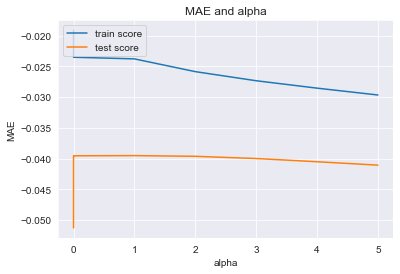

In [40]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
modelRidge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
modelRidge.fit(X_train, y_train) 

RidgeResults = pd.DataFrame(modelRidge.cv_results_)
RidgeResults = RidgeResults[RidgeResults['param_alpha']<=5]
RidgeResults.head()


# plotting mean test and train scoes with alpha 
RidgeResults['param_alpha'] = RidgeResults['param_alpha'].astype('int32')

# plotting
plt.plot(RidgeResults['param_alpha'], RidgeResults['mean_train_score'])
plt.plot(RidgeResults['param_alpha'], RidgeResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.title("MAE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### As the MAE stabilizes at alpha = 2 we will use it for ridge regression`

In [41]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

# ridge model parameters
mparams = list(ridge.coef_)
mparams.insert(0, ridge.intercept_)
mparams = [round(x, 3) for x in mparams]
cols = X_train.columns
cols = cols.insert(0, "constant")


# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("Train R2 ", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test)
print("Test R2 ",  metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Train R2  0.9655596905141827
Test R2  0.8778462979504968
RMSE : 0.06207504809361393


#### looking at R-squared and RMSE its visible that the ridge model perfoms well

In [42]:
# Create a dataframe for Ridge Coefficients
ridgedf = pd.DataFrame(list(zip(cols, mparams)))
ridgedf.columns = ['Feature', 'Coeff']

## some coeff are skewed to 0 which is making variable insignificant hence excluding them 
ridgePred = pd.DataFrame(ridgedf[(ridgedf['Coeff'] != 0)])

# Sorting the coefficients in ascending order
ridgePred = ridgePred.sort_values((['Coeff']), axis = 0, ascending = False)

print(ridgePred)

                     Feature  Coeff
13                 GrLivArea  0.119
10                  1stFlrSF  0.102
105  OverallQual_OQExcellent  0.090
11                  2ndFlrSF  0.087
9                TotalBsmtSF  0.074
..                       ...    ...
89           Condition1_RRAe -0.037
154              BsmtQual_TA -0.041
114       OverallCond_OCFair -0.053
178           KitchenQual_Gd -0.063
179           KitchenQual_TA -0.066

[194 rows x 2 columns]


#### Observation:
AS per R2 values and RSME value swe will choose lasso regression algorithm
So, Our final Equation as per Lasso Will be

Log(Y) = C +  0.112 + 0.075  + 0.062 + 0.049 + 0.028 + 0.012 - 0.004 - 0.008 - 0.012 - 0.024 - 0.031 - 0.036 - 0.049 + Error term(RSS + alpha * (sum of absolute value of coefficients)

### For Subjective Question 1 :- Ridge and Lasso after we double the alpha

#### Lasso Regression With doubled alpha i.e 0.02

In [43]:
lasso = Lasso(alpha=0.02)
lasso.fit(X_train, y_train)

# lasso model parameters
modelparam = list(lasso.coef_ )
modelparam.insert(0, lasso.intercept_)
modelparam = [round(x, 3) for x in modelparam]
cols = X_train.columns
cols = cols.insert(0, "constant")

# lasso regression

lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predictions
y_train_pred = lm.predict(X_train)
print("Train R-squared", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test)
print("Test R-squared", metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Creating a lasso coeff dataframe
paradf = pd.DataFrame(list(zip(cols, modelparam)))
paradf.columns = ['Feature', 'Coeff']

# removing non zero coeff aas they are insignificant
preddf = pd.DataFrame(paradf[(paradf['Coeff'] != 0)])

# sorting
preddf = preddf.sort_values((['Coeff']), axis = 0, ascending = False)

# top variables by lasso
print(preddf)

Train R-squared 0.721566646338611
Test R-squared 0.7056038521382931
RMSE : 0.09636732625167442
                 Feature  Coeff
0               constant  0.509
150     Foundation_PConc  0.061
110  OverallQual_OQVGood  0.022
163     BsmtFinType1_GLQ  0.006
154          BsmtQual_TA -0.003
187       FireplaceQu_NA -0.024
194     GarageFinish_Unf -0.025
179       KitchenQual_TA -0.035
146         ExterQual_TA -0.068


#### Ridge Regression With doubled alpha i.e  4

In [44]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

# ridge model parameters
mparams = list(ridge.coef_)
mparams.insert(0, ridge.intercept_)
mparams = [round(x, 3) for x in mparams]
cols = X_train.columns
cols = cols.insert(0, "constant")


# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("Train R2 ", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test)
print("Test R2 ",  metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Create a dataframe for Ridge Coefficients
ridgedf = pd.DataFrame(list(zip(cols, mparams)))
ridgedf.columns = ['Feature', 'Coeff']

# some coeff are skewed to 0 which is making variable insignificant hence excluding them 
ridgePred = pd.DataFrame(ridgedf[(ridgedf['Coeff'] != 0)])

# Sorting the coefficients in ascending order
ridgePred = ridgePred.sort_values((['Coeff']), axis = 0, ascending = False)

print(ridgePred)


Train R2  0.9655596905141827
Test R2  0.8778462979504968
RMSE : 0.06207504809361393
                     Feature  Coeff
13                 GrLivArea  0.098
10                  1stFlrSF  0.088
105  OverallQual_OQExcellent  0.073
9                TotalBsmtSF  0.070
11                  2ndFlrSF  0.067
..                       ...    ...
153              BsmtQual_Gd -0.032
114       OverallCond_OCFair -0.039
154              BsmtQual_TA -0.040
178           KitchenQual_Gd -0.056
179           KitchenQual_TA -0.059

[191 rows x 2 columns]


### For Subjective Question 3 :- Removing five most important predictor variables in the lasso model and checking the impact 

In [45]:
#checking and removing top 5 predictor variables as per lasso

#sort the coefficients in ascending order
newdf = futuredf.sort_values((['Coeff']), axis = 0, ascending = False)
print("Top 5 Features are:-")
print(newdf.head(6))


Top 5 Features are:-
                 Feature  Coeff
0               constant  0.417
13             GrLivArea  0.112
24            GarageArea  0.075
110  OverallQual_OQVGood  0.062
150     Foundation_PConc  0.049
163     BsmtFinType1_GLQ  0.028


In [46]:
# Removing these Top 5 features from X_train and x_test
print(X_train.shape,X_test.shape)
X_train = X_train.drop(["GrLivArea","GarageArea","OverallQual_OQVGood","Foundation_PConc","BsmtFinType1_GLQ"],axis=1)
X_test = X_test.drop(["GrLivArea","GarageArea","OverallQual_OQVGood","Foundation_PConc","BsmtFinType1_GLQ"],axis=1)
print(X_train.shape,X_test.shape)

(406, 220) (175, 220)
(406, 215) (175, 215)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


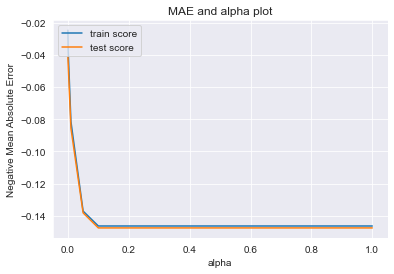

In [47]:
# creating  Lasso object
lasso = Lasso()

# cross validation using k folds
folds = 5
gridSearchModel = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    

# fiting the model for train data
gridSearchModel.fit(X_train, y_train) 


# GridSearchCV model results
GSresults = pd.DataFrame(gridSearchModel.cv_results_)
GSresults = GSresults[GSresults['param_alpha']<=1]
GSresults.head()

# plotting mean test and train scoes with alpha 
GSresults['param_alpha'] = GSresults['param_alpha'].astype('float32')

# plotting
plt.plot(GSresults['param_alpha'], GSresults['mean_train_score'])
plt.plot(GSresults['param_alpha'], GSresults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("MAE and alpha plot")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


#### After removing top predictors the best value for alphs will be 0.01

In [48]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# lasso model parameters
modelparam = list(lasso.coef_ )
modelparam.insert(0, lasso.intercept_)
modelparam = [round(x, 3) for x in modelparam]
cols = X_train.columns
cols = cols.insert(0, "constant")

# lasso regression

lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predictions
y_train_pred = lm.predict(X_train)
print("Train R-squared", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test)
print("Test R-squared", metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Creating a lasso coeff dataframe
paradf = pd.DataFrame(list(zip(cols, modelparam)))
paradf.columns = ['Feature', 'Coeff']

# removing non zero coeff aas they are insignificant
preddf = pd.DataFrame(paradf[(paradf['Coeff'] != 0)])

# sorting
preddf = preddf.sort_values((['Coeff']), axis = 0, ascending = False)

# top variables by lasso
print(preddf)

Train R-squared 0.64642001705928
Test R-squared 0.6349800568251999
RMSE : 0.10730551532539864
                       Feature  Coeff
0                     constant  0.528
10                    1stFlrSF  0.075
41   SaleDwellingType_SDTsixty  0.059
22                  GarageCars  0.035
13                BsmtFullBath  0.009
141           MasVnrType_Stone  0.001
187          GarageType_Detchd -0.001
146          Foundation_CBlock -0.008
140            MasVnrType_None -0.016
189           GarageFinish_Unf -0.029
182             FireplaceQu_NA -0.039
150                BsmtQual_TA -0.042
174             KitchenQual_TA -0.057
143               ExterQual_TA -0.068
